In [1]:
#Libraries for Machine Learning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fall = pd.read_csv('Dataset/Fall.csv', header = None)
non_fall = pd.read_csv('Dataset/NonFall.csv', header = None)
rest = pd.read_csv('Dataset/Rest.csv', header = None)

fall[0] = 1
non_fall[0] = 2
rest[0] = 3

fin = pd.concat([fall,non_fall,rest])
fin = fin.sample(frac = 1)

In [3]:
x_inp = fin.iloc[:,1:].values
y_inp = fin.iloc[:,0].values

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_inp,y_inp,random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
from matplotlib.colors import ListedColormap

def LDA_Plot(x_val, y_val, x_test, y_test, func, step = 0.01, title = "Title", dpi = 800):
    plt.figure(dpi = dpi)
    
    x_set, y_set = x_val, y_val
    #To get a meshgrid for plotting on contour
    x1, x2 = np.meshgrid( np.arange(start = x_set[:,0].min() - 1, stop = x_set[:,0].max() + 1, step = step),
                          np.arange(start = x_set[:,1].min() - 1, stop = x_set[:,1].max() + 1, step = step))
    #Plotting on the contour
    Z = func(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
    plt.contourf(x1, x2, Z,
                 cmap = ListedColormap(('red', 'green', 'blue')), alpha = 0.75)
    #Limiting the plot to max & min units of x1 & x2
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    plt.title("Decision Boundary - " + title)
    plt.savefig("Snips\\Decision Boundary - " + title)
    plt.show()
    
    plt.figure(dpi = dpi)
    
    plt.contourf(x1, x2, Z,
                 cmap = ListedColormap(('red', 'green', 'blue')), alpha = 0.75)
    #Limiting the plot to max & min units of x1 & x2
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    #Scatter plot of y_val
    for i, j in enumerate(np.unique(y_test)):
        plt.scatter(x_test[y_test==j, 0], x_test[y_test==j, 1], 
                    color = ListedColormap(("#8B0000", 'green', '#0000A0'))(i), label= j, s = 0.5) #Dark Red & Blue for clear visibility
    plt.title( "Scatter Plot on Decision Boundary - " + title)
    plt.legend()
    plt.savefig("Snips\\Scatter Plot on Decision Boundary - " + title)
    plt.show()

In [7]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Visualisation

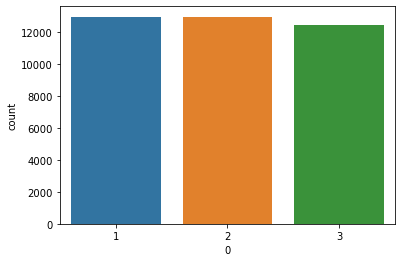

          0         1         2         3         4         5         6
0  1.000000 -0.151117  0.142837  0.451694 -0.036216 -0.145773 -0.047407
1 -0.151117  1.000000  0.004807 -0.112405  0.069664  0.104493 -0.010217
2  0.142837  0.004807  1.000000  0.079816  0.071671  0.015440 -0.050411
3  0.451694 -0.112405  0.079816  1.000000 -0.009481 -0.029380 -0.067191
4 -0.036216  0.069664  0.071671 -0.009481  1.000000  0.111857  0.041130
5 -0.145773  0.104493  0.015440 -0.029380  0.111857  1.000000  0.166901
6 -0.047407 -0.010217 -0.050411 -0.067191  0.041130  0.166901  1.000000


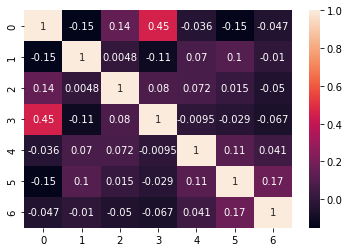

In [8]:
import seaborn as sns

#Count Plot
sns.countplot(fin[0], x="Label")
plt.show()

#Heatmap of the data
correlation = fin.corr()
print(correlation)
sns.heatmap(correlation, annot=True)
plt.show()

## XGBoost

In [9]:
from xgboost import XGBClassifier
classifier_XG = XGBClassifier(n_estimators = 600, max_depth = 10, n_jobs = 1)
classifier_XG.fit(x_train, y_train)

y_pred = classifier_XG.predict(x_train)

C:\Users\Anudeep\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix (Train Data): \n", cm)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy (Train Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Train Data): 
 [[9656    0    0]
 [   0 9695    0]
 [   0    0 9395]]
Accuracy (Train Data): 100.00 %


In [11]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Train Data: ", sen[0])
print("Sensitivity of Non-Fall for Train Data: ", sen[1])
print("Sensitivity of Rest for Train Data: ", sen[2])
print("Sensitivity of Train Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Train Data: ", spec[0] )
print("Specificity of Non-Fall for Train Data: ",  spec[1] )
print("Specificity of Rest for Train Data: ",  spec[2])
print("Specificity of Train Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Train Data:  1.0
Sensitivity of Non-Fall for Train Data:  1.0
Sensitivity of Rest for Train Data:  1.0
Sensitivity of Train Data:  100.0 %
Specificity of Fall for Train Data:  1.0
Specificity of Non-Fall for Train Data:  1.0
Specificity of Rest for Train Data:  1.0
Specificity of Train Data:  100.0 %


In [12]:
# Confusion Matrix & Accuracy for evaluating the model for test data

y_pred = classifier_XG.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Test Data): 
 [[3220   92    0]
 [  84 3141    0]
 [   0    0 3045]]
Accuracy (Test Data): 98.16 %


In [13]:
sen = np.array([ cm[0][0]/sum(cm[:, 0]), cm[1][1]/sum(cm[:, 1]), cm[2][2]/sum(cm[:, 2]) ])
print("Sensitivity of Fall for Test Data: ", sen[0])
print("Sensitivity of Non-Fall for Test Data: ", sen[1])
print("Sensitivity of Rest for Test Data: ", sen[2])
print("Sensitivity of Test Data: ", sen.mean()*100, "%")

spec = np.array([ (cm[1][1] + cm[2][2])/(sum(cm[:, 1]) + sum(cm[:, 2])), 
                  (cm[0][0] + cm[2][2])/(sum(cm[:, 0]) + sum(cm[:, 2])),
                  (cm[0][0] + cm[1][1])/(sum(cm[:, 0]) + sum(cm[:, 1]))
                ])
print("Specificity of Fall for Test Data: ", spec[0] )
print("Specificity of Non-Fall for Test Data: ",  spec[1] )
print("Specificity of Rest for Test Data: ",  spec[2])
print("Specificity of Test Data: ", spec.mean()*100, "%")

Sensitivity of Fall for Test Data:  0.9745762711864406
Sensitivity of Non-Fall for Test Data:  0.9715434580884628
Sensitivity of Rest for Test Data:  1.0
Sensitivity of Test Data:  98.20399097583011 %
Specificity of Fall for Test Data:  0.9853456514813634
Specificity of Non-Fall for Test Data:  0.9867695700110254
Specificity of Rest for Test Data:  0.9730763347101117
Specificity of Test Data:  98.17305187341668 %


In [14]:
#10 Fold Cross Validation

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_XG, X=x_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 98.13 %
Std of Accuracies:  0.0025256664298666416


In [15]:
# Choosing k, such that 98% of the variance is reatined.
# But, here even for k = 1, 100% variance is retained. So, for better data visualisation k=2 is chosen

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
# Transforming z_train & z_test using the new reduced dimension vector (U_reduce)
z_train = lda.fit_transform(x_train, y_train)
z_test = lda.transform(x_test)

In [16]:
# Analysing the SVM model fit with z_train
classifier_z = XGBClassifier(n_estimators = 600, max_depth = 10, n_jobs = 1)
classifier_z.fit(z_train, y_train)
y_z_pred = classifier_z.predict(z_train)

C:\Users\Anudeep\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:24:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [17]:
cm = confusion_matrix(y_z_pred, y_train)
print("Confustion Matrix (Z-Train Data): \n", cm)
accuracy = accuracy_score(y_train, y_z_pred)
print("Accuracy (Z-Train Data): {:.2f} %".format(accuracy*100))

Confustion Matrix (Z-Train Data): 
 [[9599    2    0]
 [  57 9693    0]
 [   0    0 9395]]
Accuracy (Z-Train Data): 99.79 %


In [18]:
y_z_pred = classifier_z.predict(z_test)

cm = confusion_matrix(y_test, y_z_pred)
print("Confusion Matrix (Z-Test Data): \n", cm)
accuracy = accuracy_score(y_test, y_z_pred)
print("Accuracy (Z-Test Data): {:.2f} %".format(accuracy*100))

Confusion Matrix (Z-Test Data): 
 [[2657  652    3]
 [ 464 2761    0]
 [   0    0 3045]]
Accuracy (Z-Test Data): 88.32 %


In [19]:
# 10_Fold CV accuracy

z_inp = lda.transform(x_inp)

accuracies = cross_val_score(estimator=classifier_z, X=z_inp, y=y_inp, cv=10, n_jobs=-1)
print("Mean of Accuracies: {:.2f} %".format(accuracies[1:].mean()*100))
print("Std of Accuracies: ", accuracies[1:].std())

Mean of Accuracies: 86.00 %
Std of Accuracies:  0.0038221573046275928


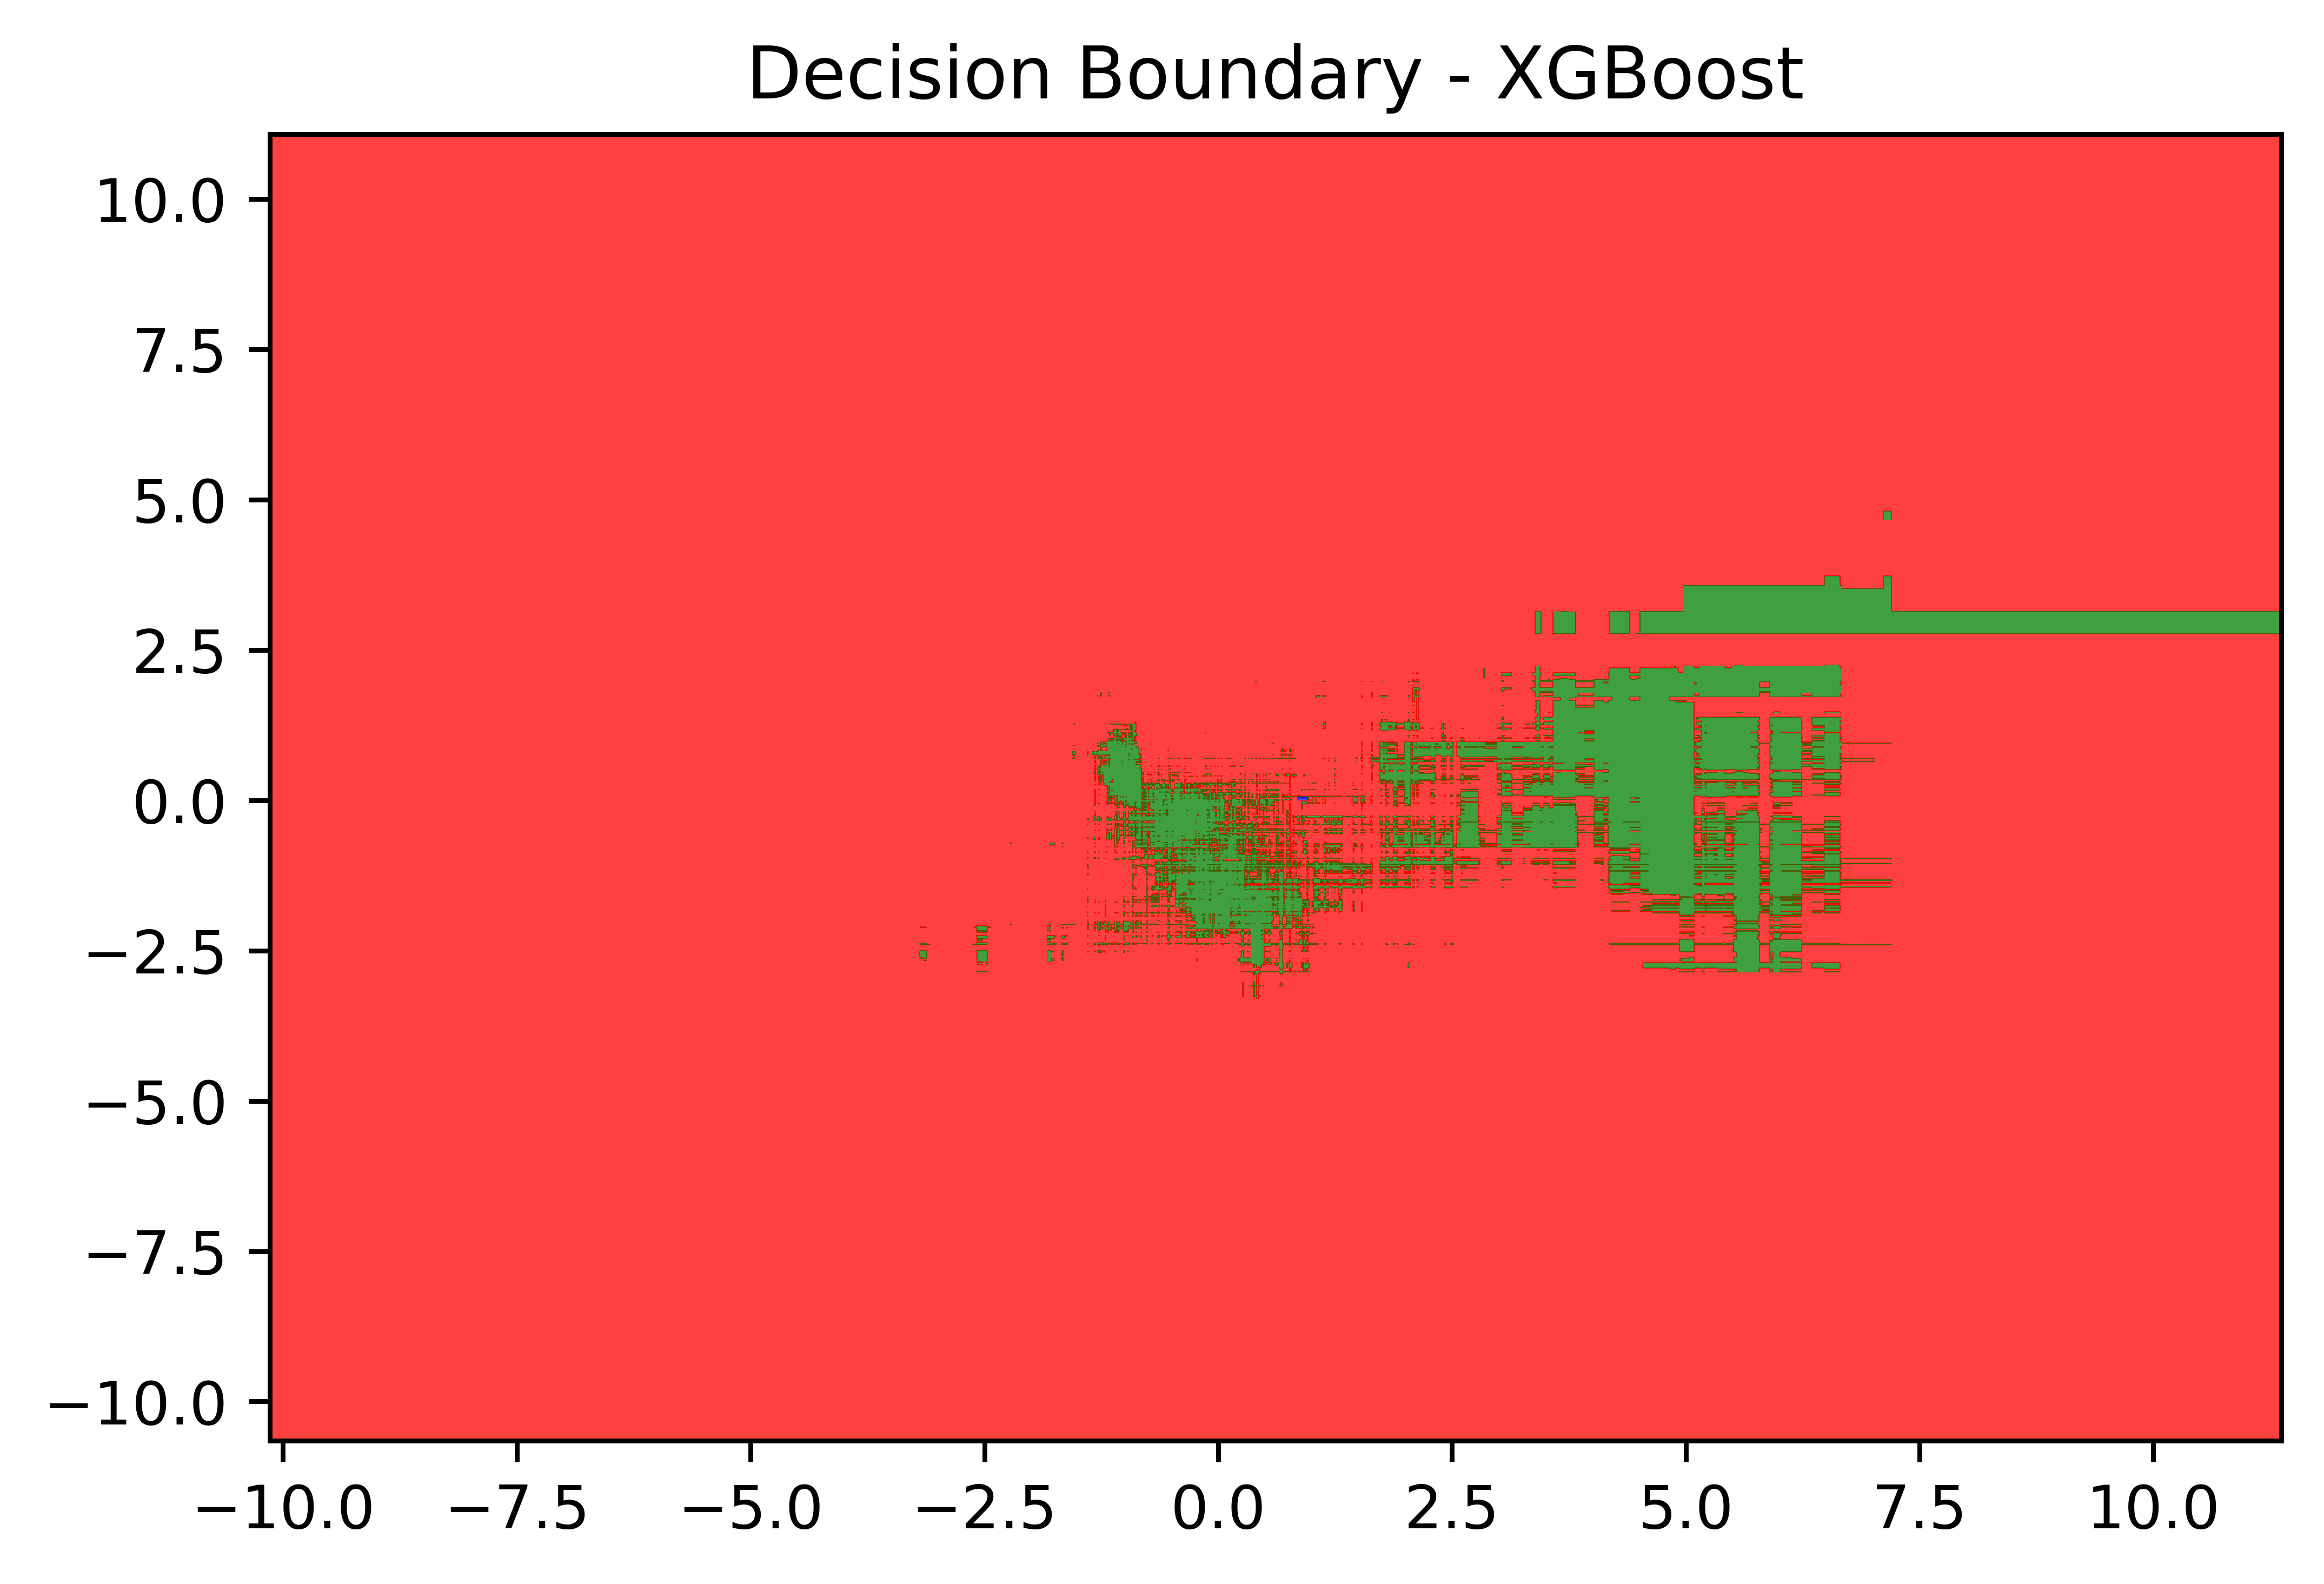

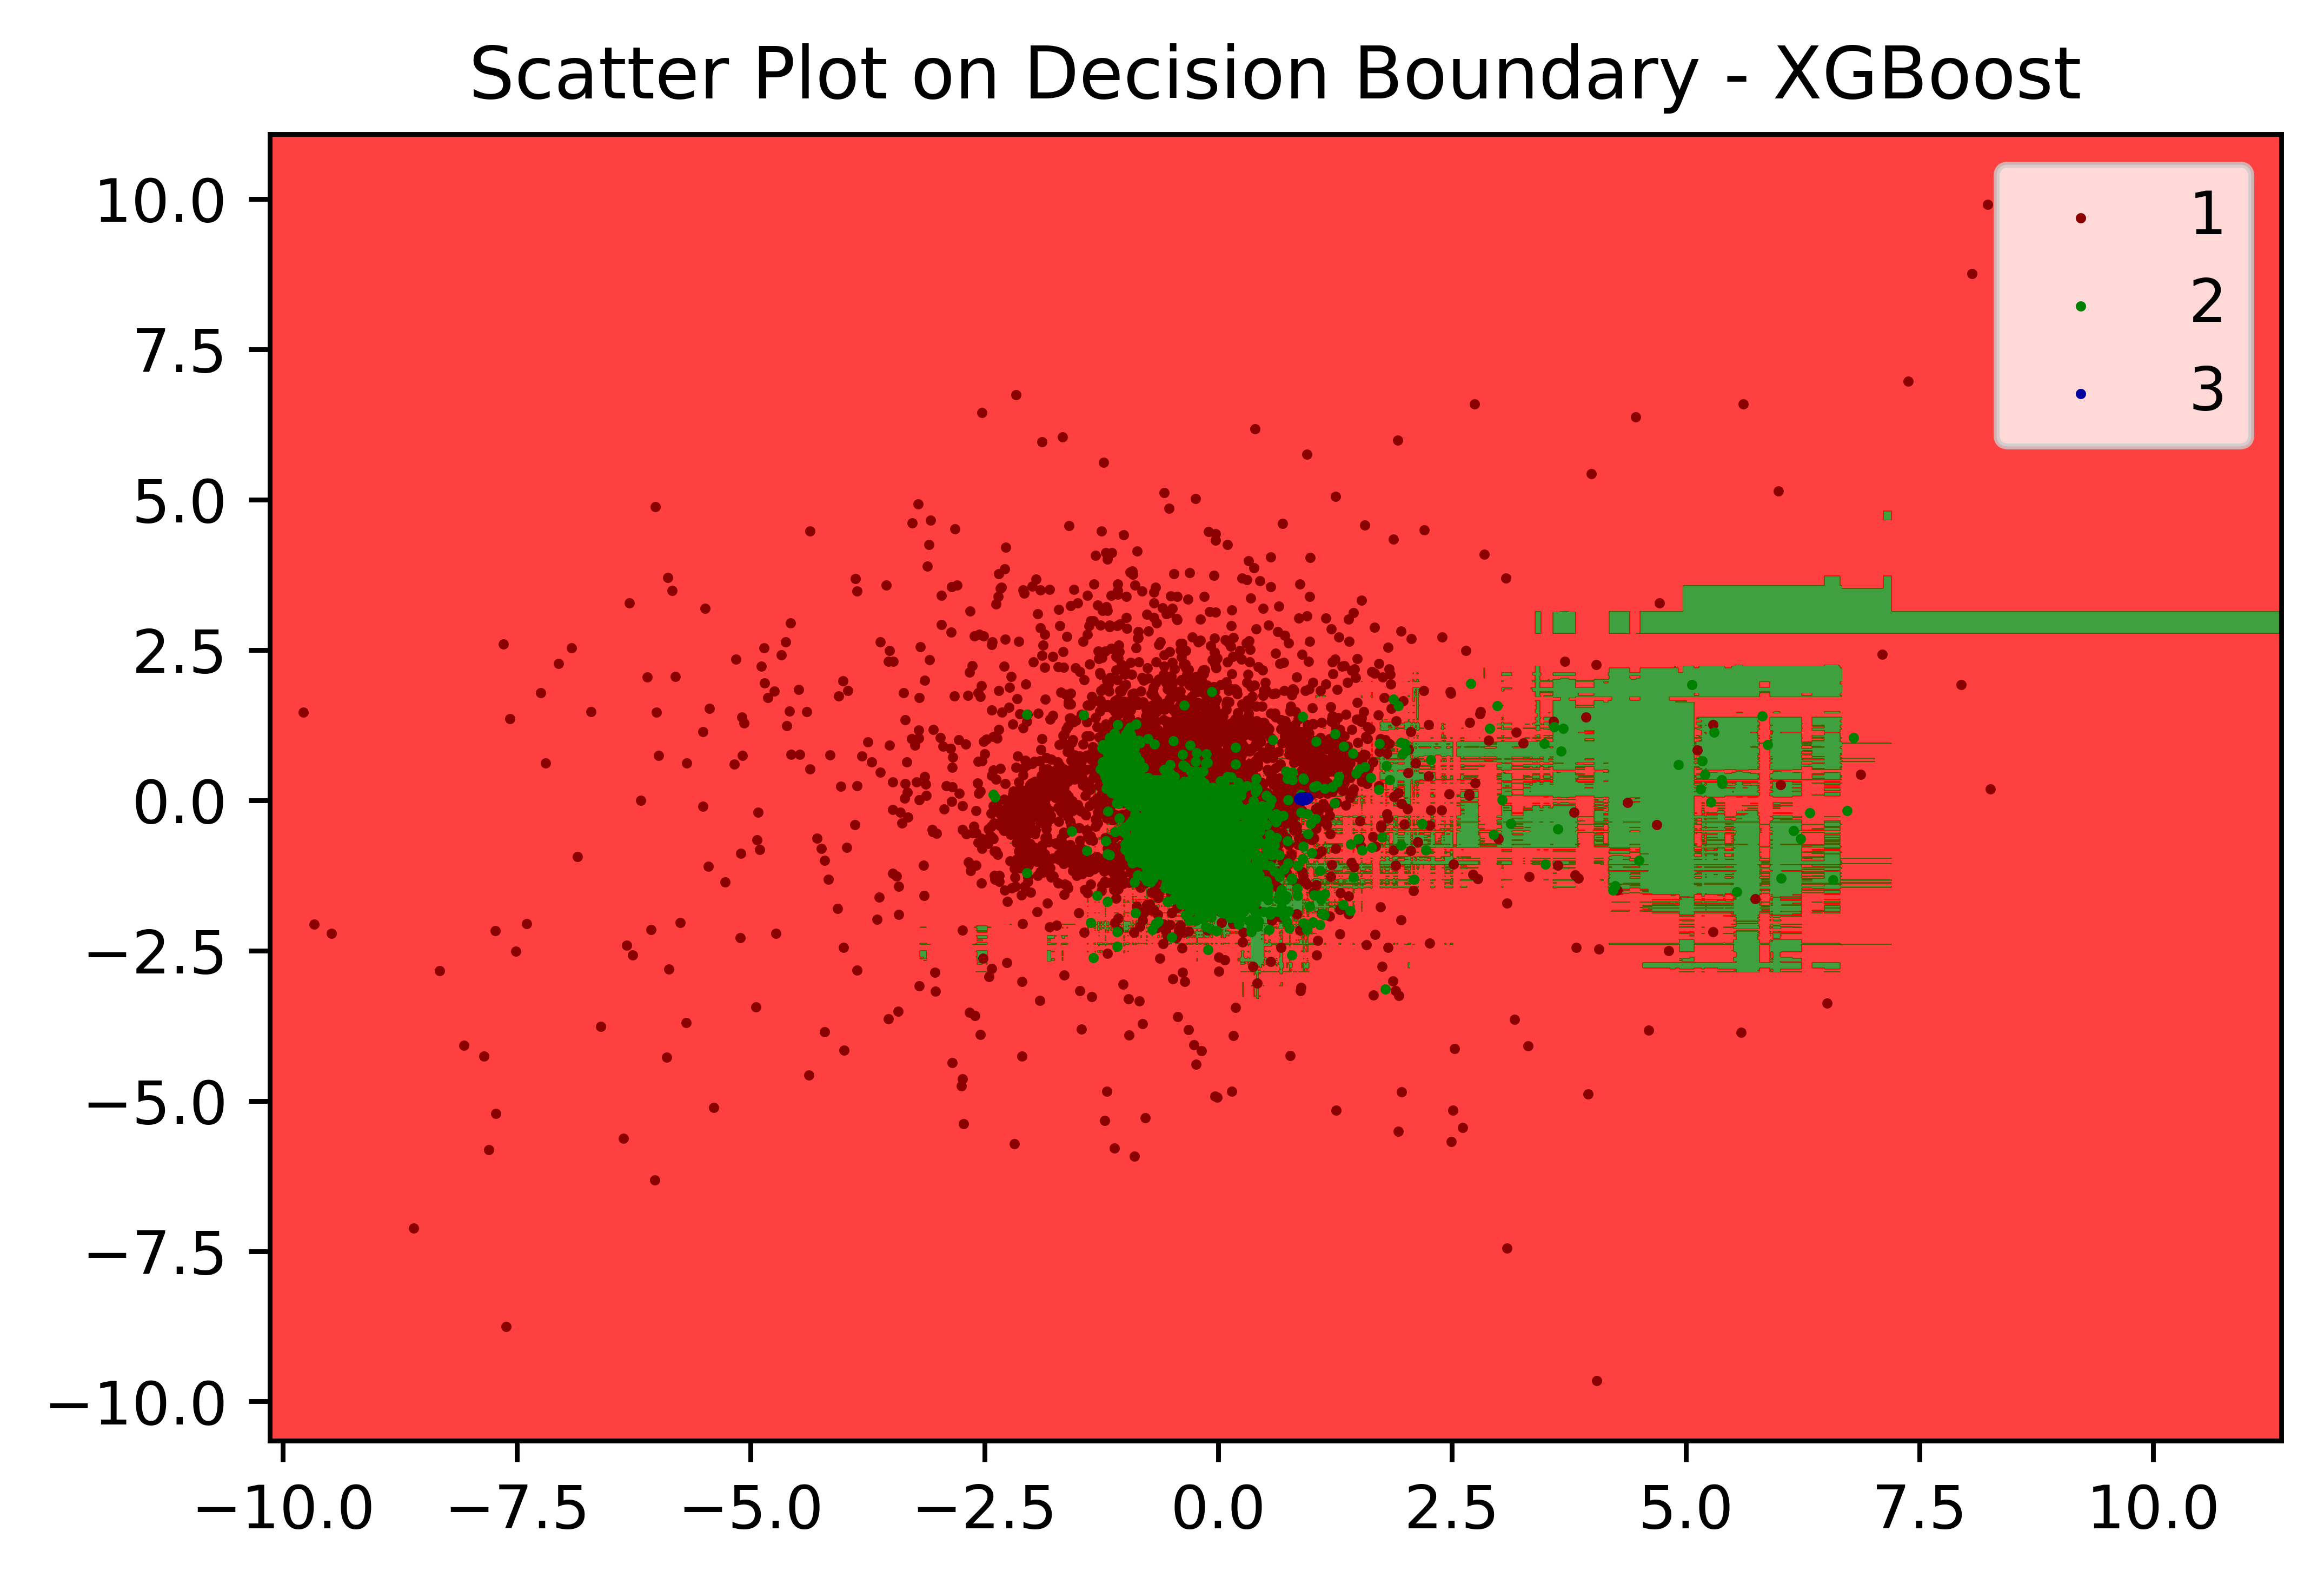

In [20]:
LDA_Plot(z_train, y_train, z_test, y_test, func = classifier_z.predict ,title = "XGBoost")

## Validation

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

accuracies_xg = []

for i in range(5):
    x_v = sc.transform(pd.read_csv("Validation_Set/" + str(i+1) + "Fall_v.csv", header=None).iloc[:,1:].values)
    
    y_pred = classifier_XG.predict(x_v)
    accuracies_xg.append( (sum(y_pred == 1)/len(y_pred))*100 )

x_v = sc.transform(pd.read_csv("Validation_Set/NonFall_v.csv", header=None).iloc[:,1:].values)

y_pred = classifier_XG.predict(x_v)
accuracies_xg.append( (sum(y_pred == 2)/len(y_pred))*100 )

x_v = sc.transform(pd.read_csv("Validation_Set/Rest_v.csv", header=None).iloc[:,1:].values)

y_pred = classifier_XG.predict(x_v)
accuracies_xg.append( (sum(y_pred == 3)/len(y_pred))*100)

print("Accuarcy of XGBoost on Validation Set: " , sum(accuracies_xg)/len(accuracies_xg), "%")

Accuarcy of XGBoost on Validation Set:  98.24171488954865 %


## Testing on Live Data

In [18]:
def Call(GSMPort):
    print("Calling Hospital")
    
    GSMPort.write(b'ATZ\r')
    time.sleep(0.5)
    
    winsound.Beep(800,500)
    
    GSMPort.write(b'AT+CMGF=1\r')
    time.sleep(0.5)
    
    GSMPort.write(b'ATD+918919029787;\r')
    time.sleep(20)
    
    GSMPort.write(b'ATH\r')
    time.sleep(0.5)

    GSMPort.write(chr(26))
    time.sleep(0.5)
    
    GSMPort.close()

In [21]:
bandPort.close()
GSMPort.close()

In [20]:
import winsound
import serial, time

bandPort = serial.Serial(port = "COM5", baudrate=9600, timeout=0.1, stopbits=serial.STOPBITS_ONE)

x_inp = []
FALL_THRES = 100

while(1):
    if(bandPort.in_waiting > 0):
        try:
            serialString = bandPort.readline().strip().decode("utf-8")
            inp = serialString.split(",")
            inp = list(map(int, inp))[1:]
            #inp = np.asarray(list(map(int, inp))[1:])
            #print(inp)
            
            if(len(inp) == 6 and len(x_inp) < FALL_THRES):
                x_inp.append(inp)
                
            elif(len(x_inp) >= FALL_THRES): 
                y_pred = classifier_XG.predict(sc.transform(np.asarray(x_inp)))
                out = np.bincount(y_pred).argmax()
                if (out == 1):
                    GSMPort = serial.Serial("COM4" , 9600 , timeout = .1)#Port of GSM Module
                    print("Its a Fall")
                    Call(GSMPort)
                elif(out == 2):
                    print("Its a non-Fall")
                elif(out == 3):
                    print("At Rest")
                bandPort.flush()
                x_inp = []
                continue
                
            else:
                continue
                
        except Exception:
            continue   

Its a Fall
Calling Hospital


KeyboardInterrupt: 